#Naive Bayes

ML Lab 6

Naive Bayes

---



Vemula Ananya

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load dataset
data = pd.read_csv('/content/TitanicDataset.csv')  # Update this path if needed

In [ ]:
# Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Binary encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)


<ipython-input-30-42d5bb364caf>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-30-42d5bb364caf>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Select features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Naïve Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naïve Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Using Categorical Naive Bayes (Can't be used for negative values, Hence, using abs())
encoder = LabelEncoder()
X_fixed = np.abs(X_train)

model_CNB = CategoricalNB()
model_CNB.fit(X_fixed, y_train)

CategoricalNB()

Test Accuracy: 0.79


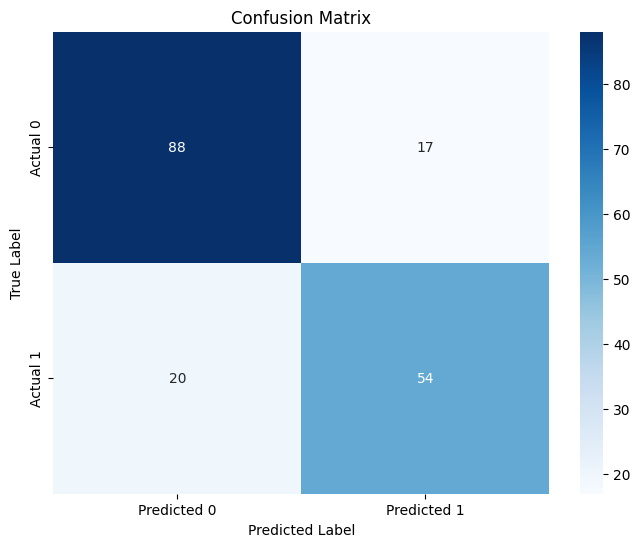

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.76


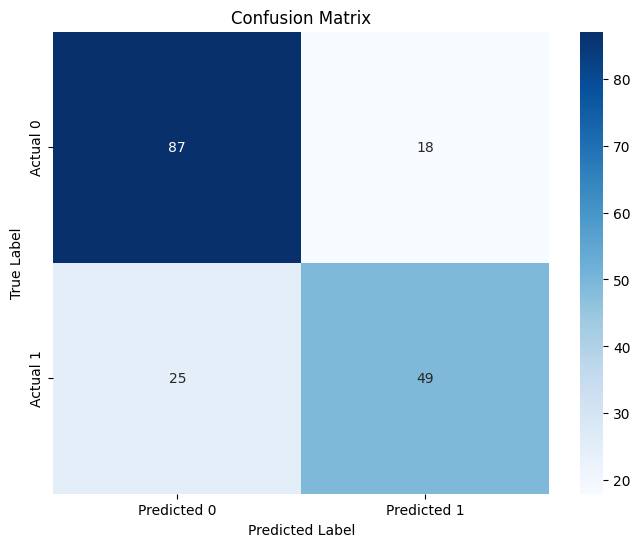

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       105
           1       0.73      0.66      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [ ]:
#Make Predictions
X_test_Fixed = np.abs(X_test)
y_pred_CNB = model_CNB.predict(X_test_Fixed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_CNB)
print(f"Test Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_CNB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_CNB))